In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Modeling

Our purpose is predict the price based on the given dataset. Since price is a continous variable we need to do a regression task. Therefore, we will use the Regression models of the traditional models such as KNN, SVM. 

We are not after accuracy, because we are doing a regression task, not a classification task. Our main metric will be mean squared error and we will try to minimize it with some methods such as hyperparameter tuning. 

Almost in every model we have sections such as




Before Hyperparameter Tuning( We are trying model with default 



*   Train model with the default parameters

*   See the error and r2 score

*   Compare with other models and results

After Hyperparameter Tuning



*   Determine the parameter grid
*   Do a gridsearch to get best model parameters.
* Compare with the default model and other models.





### DATA PREPARATION

In [2]:
#reading data
df = pd.read_csv('prepared_data.csv')
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Dropping Unnecessary Columns

In [3]:
#drop unnecessary column
df.drop(['host_id','name','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


#### ENCODING

In [4]:
df.dtypes

neighbourhood_group               object
room_type                         object
price                              int64
minimum_nights                     int64
calculated_host_listings_count     int64
availability_365                   int64
dtype: object

As we can see above the neighbourhood_group, neighbourhood, room type, host_is_superhost, host_response time and host_response rate are all categorical columns. Let's encode them, se we can use them in training.

In [5]:
from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include=['object']).columns

for i in categorical:
    df[i] = LabelEncoder().fit_transform(df[i])


df.dtypes

neighbourhood_group               int64
room_type                         int64
price                             int64
minimum_nights                    int64
calculated_host_listings_count    int64
availability_365                  int64
dtype: object

In [6]:
df = df.reset_index(drop=True)
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,149,1,6,365
1,2,0,225,1,2,355
2,2,1,150,3,1,365
3,1,0,89,1,1,194
4,2,0,80,10,1,0


Let's determine train data and target column. After that scale the data.
Split the data as:


*   Training: 80%
*   Test : 20%

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df["price"] = np.log1p(df["price"])

X = df.drop(columns=['price'])
y = df['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")


X.head()

There are 43991 traning data
There are 4888 test data


,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,-0.917868,0.909470,-0.300314,-0.034769,1.916323
1,0.441126,-0.924213,-0.300314,-0.156138,1.840342
2,0.441126,0.909470,-0.200393,-0.186480,1.916323
3,-0.917868,-0.924213,-0.300314,-0.186480,0.617049
4,0.441126,-0.924213,0.149331,-0.186480,-0.856981


### MODEL TRAINING

What has been done in this section:


1.   Trained in Various Models
2.   In Each model, we tried to minimize the mean_squared_error with using hyperparameter tuning and cross validation.
3. Showed results in each model.
4. Model comparison, (which model performed best)



#### Evalution Metrics

*MSE (mean squared error)*: $\frac{1}{N}\sum_i \, (y_{true_i} - y_{pred_i})^2 \,$


*RMSE (root mean squared error)*: $\sqrt{\frac{1}{N}\sum_i \, (y_{true_i} - y_{pred_i})^2}$


*MAE (mean absolute error)*: $\frac{1}{N} \sum_i \, |y_{true_i} - y_{pred_i}| \,$

Since we are measuring the errors, we want to **minimize** these metrics.

#### K NEAREST NEIGHBOUR

**K NEAREST NEIGHBOUR** can be used for ***regression***. But there is a better model which is **KNeighborsRegressor** which is used for regression tasks. Therefore, we will try ***KNeighborsRegressor*** for our price prediction goal. 

##### BEFORE HYPERPARAMATER TUNING

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(5, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: 0.267304530004297
Mean Absolute Error: 0.3755447601172657
Root Mean Absolute Error: 0.5170150191283586
R2 score: 0.44104632349900375


R2 score is 0.537 which means there is a correlation between the predictions and the actual values. The mean squared Error is 5661. 

In [9]:
prediction_dictionaries = {'KNN-Default': y_pred}

In [10]:
prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'KNN-Default': y_pred.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)
prediction_list

,KNN-Default
Actual Values,
5.583496,5.530561
4.094345,4.173382
3.931826,3.969236
3.526361,3.613199
3.526361,3.984643
6.165418,6.032460
3.761200,4.519436
5.968708,6.039628
6.552508,4.740353


In [11]:
error_dict = {'KNN Default': [mse, r2]}
error_list = pd.DataFrame()
error_list['KNN Default'] = [mse, r2]
error_list.reset_index(inplace=True, drop=True)
#error_list.rename(columns={0: 'MSE KNN Default'}, inplace=True)
error_list.index =['Mean Squared Error', 'R2 Score']
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046


In [12]:
import warnings
warnings.filterwarnings('ignore')

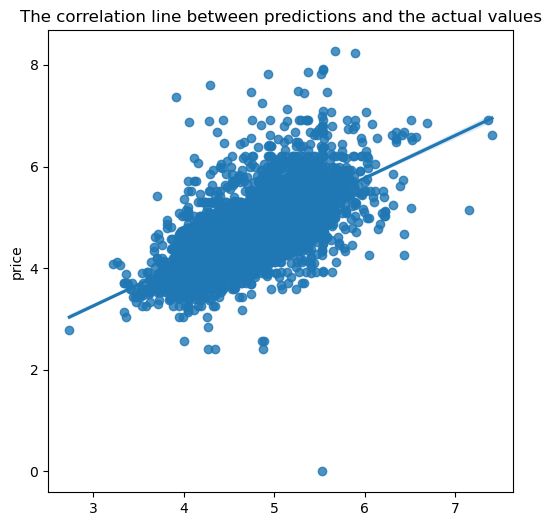

In [13]:
plt.figure(figsize=(6,6))
sns.regplot(y_pred, y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()

##### HYPERPARAMETER TUNING FOR KNN

Since we have hyperparamaters such as number of nearest neighbour, or distance metric, we will apply hyperparamater tuning to see if we can decrease the error. Let's test it by:


*   Number of Neighbours(1, .... ,10)
*   LDistance Function (1: Euclidean, 2: Manhattan)

Cross Validations: 

*   And since we split the data by 80 training, 20 test data. We will do 100 / 20 = 5 cross validation splits.

  

We will use GridSearchCV which searchs the model with all possible combinations with using cross validation. It calculates all the scores and finds the model which performed best 



In [14]:
#Bu niye uzun sürdü acaba? Bir task a 36s (Bakacağım)
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1, 2],  
              'n_neighbors' : [ 5, 10, 15]
              } 

grid_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_knn.fit(X, y)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [15]:
print(f"Best parameters are {grid_knn.best_params_}") 
print("Best score is {}".format(grid_knn.best_score_ * -1))
print("Best model is {}".format(grid_knn.best_estimator_))
#print("The score for hyperparameter tuning are {}".format(grid.cv_results_))

Best parameters are {'n_neighbors': 15, 'p': 1}
Best score is 0.2638033163023705
Best model is KNeighborsRegressor(n_jobs=-1, n_neighbors=15, p=1)


In [16]:
knr_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')
knr_best.fit(X_train, y_train)
y_pred_best = knr_best.predict(X_test)

mse_knn_best = mean_squared_error(y_pred_best, y_test)
mae_knn_best = mean_absolute_error(y_pred, y_test)
rmse_knn_best = np.sqrt(mse)
r2_knn_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error: {}".format(mse_knn_best))
print("Mean Absolute Error: {}".format(mae_knn_best))
print("Root Mean Absolute Error: {}".format(rmse_knn_best))
print("R2 score: {}".format(r2_knn_best))

Mean Squared Error: 0.24162229970310325
Mean Absolute Error: 0.3755447601172657
Root Mean Absolute Error: 0.5170150191283586
R2 score: 0.49474977943133214


In [17]:
prediction_dictionaries['Knn-Best']   = y_pred_best

In [18]:
prediction_list['KNN-Best'] = y_pred_best[:20]
prediction_list

,KNN-Default,KNN-Best
Actual Values,,
5.583496,5.530561,5.265173
4.094345,4.173382,4.209026
3.931826,3.969236,4.089967
3.526361,3.613199,3.658071
3.526361,3.984643,3.809675
6.165418,6.032460,5.941771
3.761200,4.519436,4.528826
5.968708,6.039628,5.895784
6.552508,4.740353,4.856843


In [19]:
error_list['MSE KNN-Best'] = [mse_knn_best, r2_knn_best]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750


WE Can see a improvement in the best model in both of the metrics.

#### SUPPORT VECTOR MACHINE

LinearSVR is support vector machine for regression problems. Therefore we will use first default paramaters and we will apply hyperparameter tuning. In most regression cases LinearSVR perform faster and more accurate results. 

Source: [SkLearn- LinearSVR ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

In [20]:
from sklearn.svm import LinearSVR, SVR
clf_svr = LinearSVR()
clf_svr.fit(X_train, y_train)

preds_svr = clf_svr.predict(X_test)

mse_svr = mean_squared_error(preds_svr, y_test)
mae_svr = mean_absolute_error(preds_svr, y_test)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, preds_svr)

print("Mean Squared Error: {}".format(mse_svr))
print("Mean Absolute Error: {}".format(mae_svr))
print("Root Mean Absolute Error: {}".format(rmse_svr))
print("R2 Score: {}".format(r2_svr))

Mean Squared Error: 0.29478342720503276
Mean Absolute Error: 0.39439636705367936
Root Mean Absolute Error: 0.5429396165367129
R2 Score: 0.38358590329476216


The error is slightly worse than KNN. Now let's see the points

In [21]:
def plot_all_r2():
    length = len(prediction_dictionaries)
    n_col = 2
    if length < 2:
        n_col = length % 2

    nrow = 1
    if(length > 2):
        nrow = int(length / 2) 
        if length % 2 != 0:
            nrow+=1

    fig, axes = plt.subplots(nrow, n_col, figsize=( 16, 3 * length))
    for ax, key in zip(axes.flatten(), prediction_dictionaries.keys()):
        sns.regplot(prediction_dictionaries[key], y_test, ax=ax)
        ax.set_title("The correlation line in {}".format(key))
    plt.show()

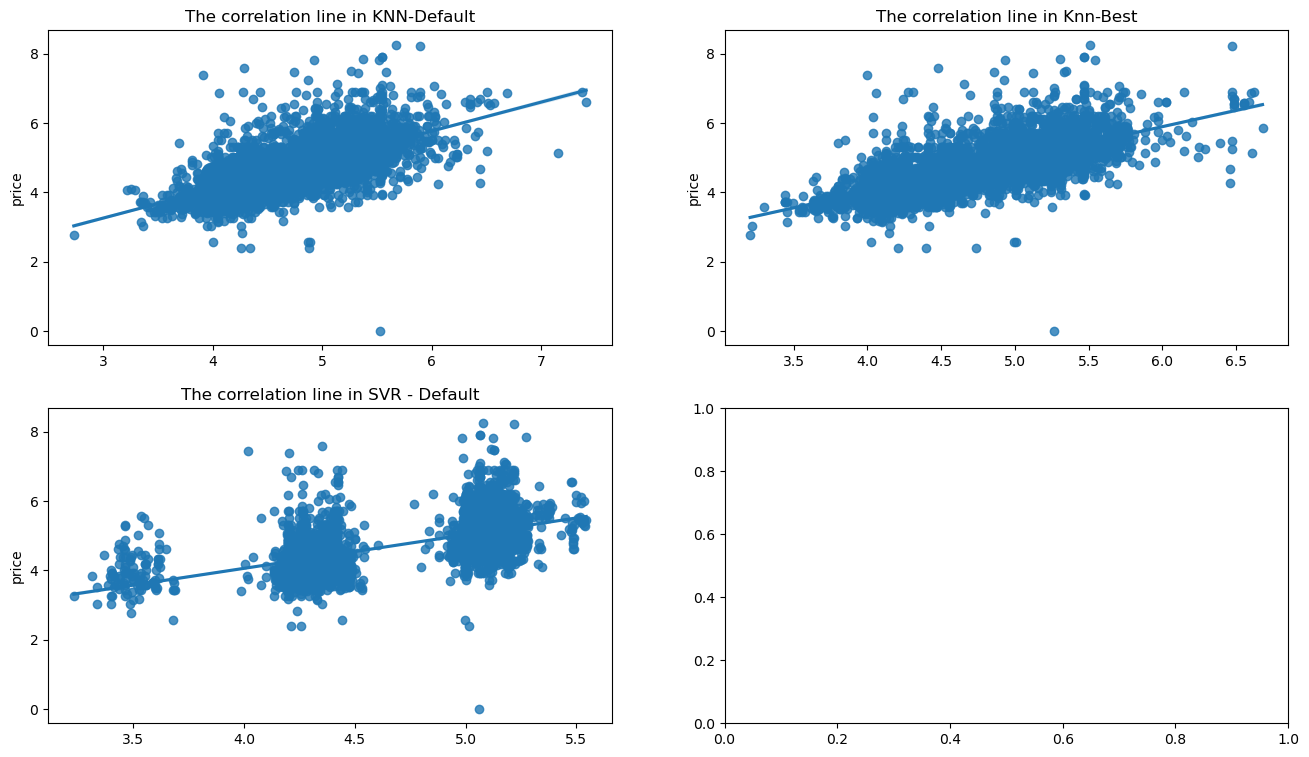

In [22]:
prediction_dictionaries['SVR - Default'] = preds_svr
plot_all_r2()

As the graph shows there is a correlation between predictions and the actual values. It means model predictions consistent with the actual values. The other comment is that the line in KNN_best is better than the first model. The reason for that second model checks for more neighbours, therefore the result for the second model is more consistent.

In [23]:
prediction_list['SVR-Default'] = np.array(preds_svr[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default
Actual Values,,,
5.583496,5.530561,5.265173,5.061016
4.094345,4.173382,4.209026,4.335282
3.931826,3.969236,4.089967,4.297170
3.526361,3.613199,3.658071,4.317732
3.526361,3.984643,3.809675,4.473532
6.165418,6.032460,5.941771,5.500234
3.761200,4.519436,4.528826,4.308242
5.968708,6.039628,5.895784,5.496034
6.552508,4.740353,4.856843,5.128876


In [24]:
error_list['SVR Default'] = [mse_svr, r2_svr]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586


The numbers are slightly worse than the KNN with best performance. Numbers are not bad, but let's see if we can improve the performance with hyperparameter tuning. 

##### APPLY HYPERPARAMETER TUNING AND CROSS VALIDATION

The parameters for the Linear SVR:



*   **loss:**  Specifies the loss function (Either L1 Loss or l2 loss)
*   **C:** Regularization parameter. ('C': [0.1, 1, 10, 100, 1000])


*   **dual:** dual or primal optimization problem. (Either True or False)


What we are going to do:



*   Use grid search to fit all those parameters
*   In each iteration use 5 cross validation points

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'dual': [True, False],
              'tol': [0.0001, 0.00001]} 

grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-pack

/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sadiazaman/opt/anaconda3/lib/python3.9/site-pack

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [26]:
print(f"Best parameters are {grid.best_params_}") 
print("Best score is {}".format(grid.best_score_ * -1))
print("Best model is {}".format(grid.best_estimator_))
print("scores {}".format(grid.cv_results_['mean_test_score']))

Best parameters are {'C': 0.1, 'dual': True, 'loss': 'epsilon_insensitive', 'tol': 0.0001}
Best score is 0.3011725894839436
Best model is LinearSVR(C=0.1)
scores [-0.30117259 -0.30096407 -0.29630531 -0.29630539         nan         nan
 -0.29629147 -0.29629182 -0.30145678 -0.30191016 -0.29643762 -0.2964409
         nan         nan -0.29629664 -0.29629698 -0.30339365 -0.30664725
 -0.29940066 -0.29788462         nan         nan -0.29629719 -0.29629754
 -0.35212796 -0.43348593 -0.33553118 -0.37900101         nan         nan
 -0.29629725 -0.29629759 -0.95392729 -0.91727602 -0.71968744 -0.55161069
         nan         nan -0.29629725 -0.2962976 ]


In [27]:
svr_best = LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

svr_best.fit(X_train, y_train)

preds_svr_best = svr_best.predict(X_test)

mse_svr_best = mean_squared_error(preds_svr_best, y_test)
mae_svr_best = mean_absolute_error(preds_svr_best, y_test)
rmse_svr_best = np.sqrt(mse_svr_best)
r2_svr_best = r2_score(y_test, preds_svr_best)

print("Mean Squared Error: {}".format(mse_svr_best))
print("Mean Absolute Error: {}".format(mae_svr_best))
print("Root Mean Absolute Error: {}".format(rmse_svr_best))
print("R2 Score: {}".format(r2_svr_best))

Mean Squared Error: 0.29482591789990326
Mean Absolute Error: 0.39454029528006773
Root Mean Absolute Error: 0.542978745348198
R2 Score: 0.38349705208780893


The mean squared error is slightly better than the default model. But there is not much difference. 

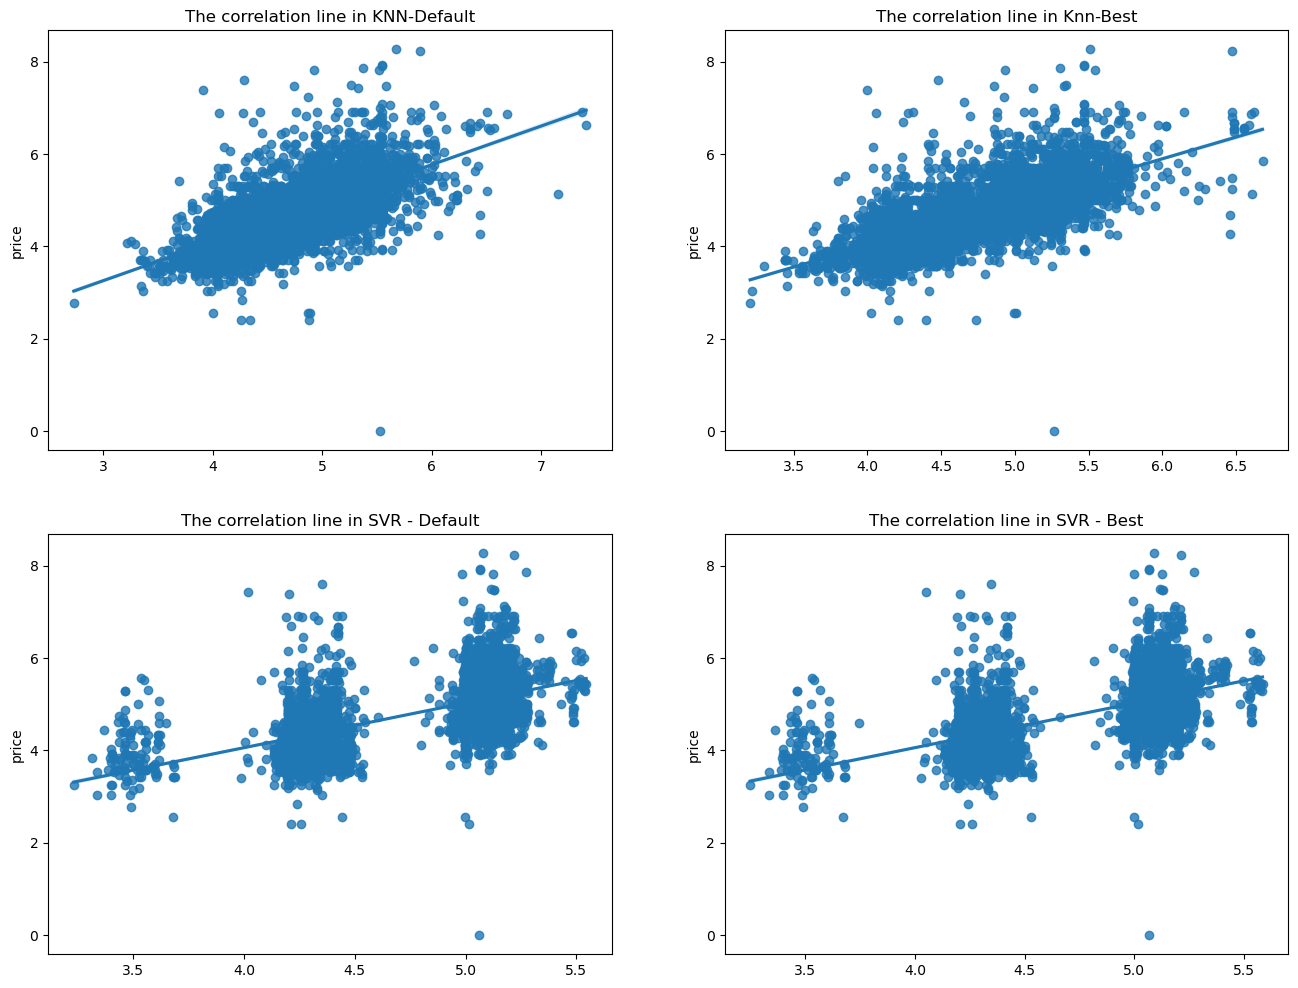

In [28]:
prediction_dictionaries['SVR - Best'] = preds_svr_best
plot_all_r2()

In [29]:
prediction_list['SVR-Best'] = np.array(preds_svr_best[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default,SVR-Best
Actual Values,,,,
5.583496,5.530561,5.265173,5.061016,5.066250
4.094345,4.173382,4.209026,4.335282,4.328617
3.931826,3.969236,4.089967,4.297170,4.300264
3.526361,3.613199,3.658071,4.317732,4.333715
3.526361,3.984643,3.809675,4.473532,4.477010
6.165418,6.032460,5.941771,5.500234,5.544217
3.761200,4.519436,4.528826,4.308242,4.308687
5.968708,6.039628,5.895784,5.496034,5.540218
6.552508,4.740353,4.856843,5.128876,5.125432


In [30]:
error_list['SVR Best'] = [mse_svr_best, r2_svr_best]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586
SVR Best,0.294826,0.383497


It can be seen that **KNN performed better mostly** (we can see it also from MSE scores). **Hyperparameter tuning for SVR does perform better than the default model.** But there is not much difference. The reason might be that there is no much difference between models in terms of parameters and the difference is not enough to get a huge difference. 

#### DECISION TREE
Decision Tree can be used for classification and regression. Here, we use Decision Tree for regression.

###### BEFORE HYPERPARAMETER TUNING

In [31]:
from sklearn import tree
from sklearn import metrics

tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train) # x -> features, y->target (price)
tree_model_prediction = tree_model.predict(X_test)

see_result = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': tree_model_prediction
    })

tree_mse = metrics.mean_squared_error(y_test, tree_model_prediction)
tree_mae = metrics.mean_absolute_error(y_test, tree_model_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = metrics.r2_score(y_test, tree_model_prediction)

print("Mean Squared Error: {}".format(tree_mse))
print("Mean Absolute Error: {}".format(tree_mae))
print("Root Mean Absolute Error: {}".format(tree_rmse))
print("R2 score: {}".format(tree_r2))

Mean Squared Error: 0.3361436621883782
Mean Absolute Error: 0.4065508970428017
Root Mean Absolute Error: 0.5797789770148433
R2 score: 0.29709857214285684


The error is 8509 for default Decision Tree Regressor. Although this error is less than Knn's result, it is still more than SVM's result.


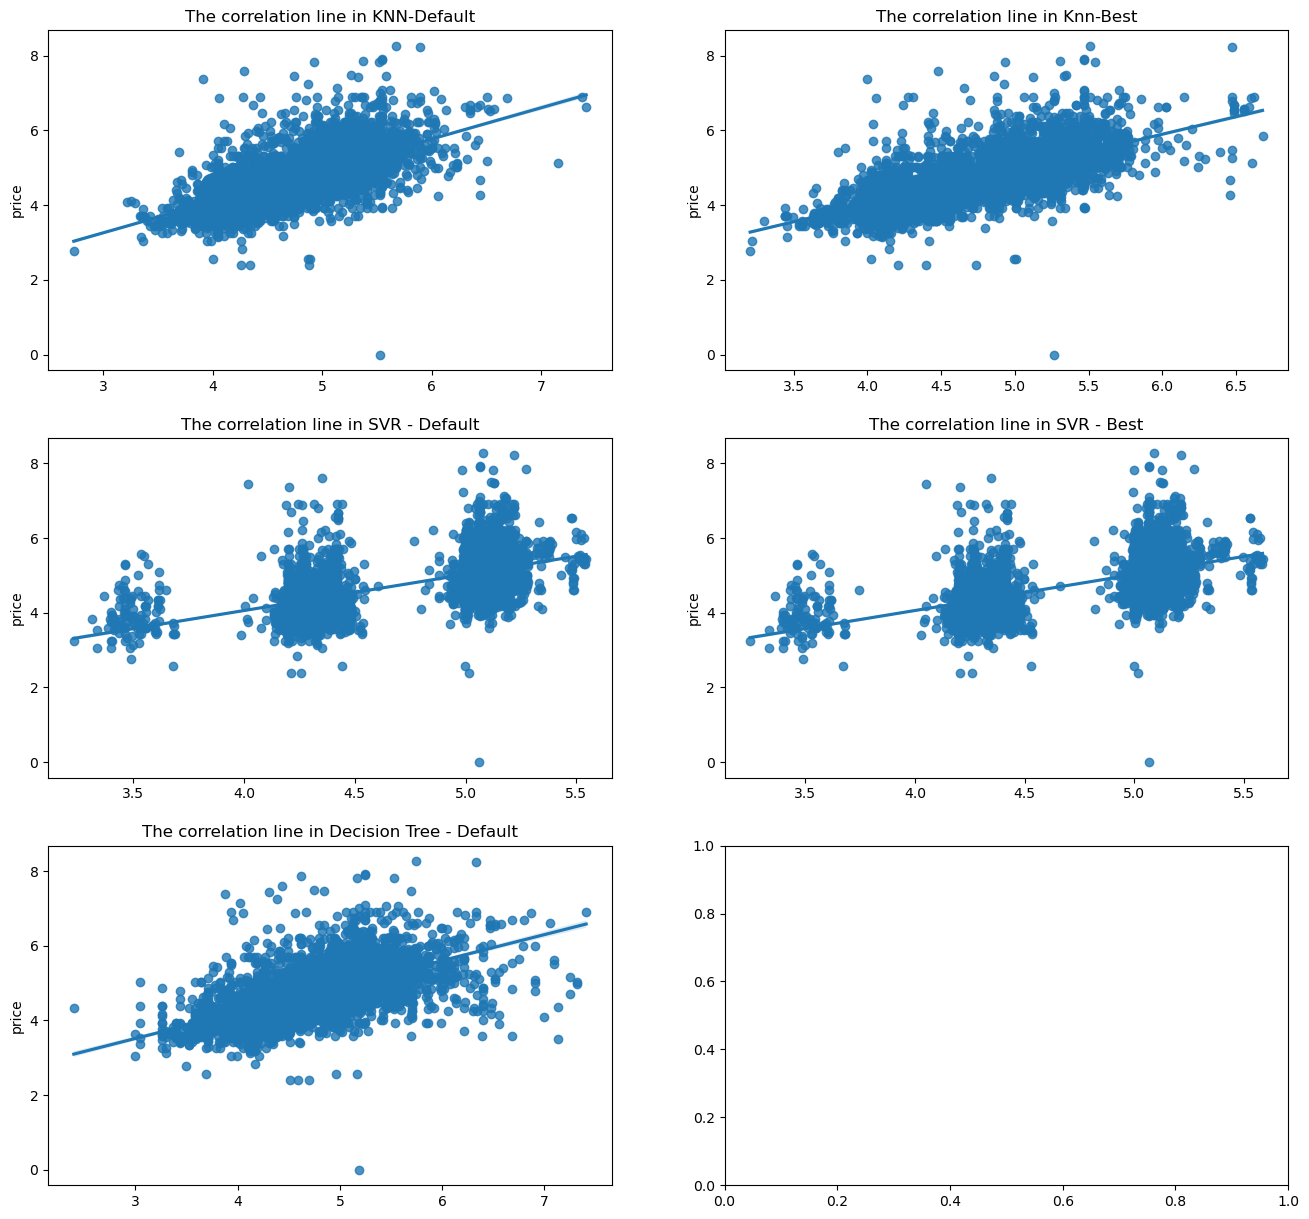

In [32]:
prediction_dictionaries['Decision Tree - Default'] = tree_model_prediction
plot_all_r2()

In [33]:
prediction_list['Decision Tree - Default'] = np.array(preds_svr[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default,SVR-Best,Decision Tree - Default
Actual Values,,,,,
5.583496,5.530561,5.265173,5.061016,5.066250,5.061016
4.094345,4.173382,4.209026,4.335282,4.328617,4.335282
3.931826,3.969236,4.089967,4.297170,4.300264,4.297170
3.526361,3.613199,3.658071,4.317732,4.333715,4.317732
3.526361,3.984643,3.809675,4.473532,4.477010,4.473532
6.165418,6.032460,5.941771,5.500234,5.544217,5.500234
3.761200,4.519436,4.528826,4.308242,4.308687,4.308242
5.968708,6.039628,5.895784,5.496034,5.540218,5.496034
6.552508,4.740353,4.856843,5.128876,5.125432,5.128876


In [34]:
error_list['Decision Tree - Default'] = [tree_mse, tree_r2]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586
SVR Best,0.294826,0.383497
Decision Tree - Default,0.336144,0.297099


Decision Tree is the worst so far

##### APPLY HYPERPARAMETER TUNING AND CROSS VALIDATION

Parameters that is used for Decision Tree Regressor:


1.   **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
2.   **min_samples_leaf**:The minimum number of samples required to be at a leaf node.
3.   **min_samples_split**:The minimum number of samples required to split an internal node.

[Reference to explanation of parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


What we are going to do:

1.   Use grid search to fit all those parameters
2.   In each iteration use 5 cross validation points


In [35]:
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
}
tree_grid = GridSearchCV(tree_model, parameters, refit = True, verbose = 1, n_jobs=-1, cv=5, scoring="neg_mean_squared_error") 
tree_grid.fit(X, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [36]:
print(f"Best parameters are {tree_grid.best_params_}") 
print("Best MSE is {}".format(tree_grid.best_score_ * -1))

Best parameters are {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best MSE is 0.25505809275974123


In [37]:
tree_model_best = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 4, min_samples_split = 4)
tree_model_best.fit(X_train, y_train) 
tree_model_prediction_best = tree_model_best.predict(X_test)

tree_mse_best = metrics.mean_squared_error(y_test, tree_model_prediction_best)
tree_mae_best = metrics.mean_absolute_error(y_test, tree_model_prediction_best)
tree_rmse_best = np.sqrt(tree_mse_best)
tree_r2_best = metrics.r2_score(y_test, tree_model_prediction_best)

print("Mean Squared Error: {}".format(tree_mse_best))
print("Mean Absolute Error: {}".format(tree_mae_best))
print("Root Mean Absolute Error: {}".format(tree_rmse_best))
print("R2 score: {}".format(tree_r2_best))

Mean Squared Error: 0.24392335147573038
Mean Absolute Error: 0.35554233775049887
Root Mean Absolute Error: 0.493885970114287
R2 score: 0.48993810883185385


R2 score has significant increase from 0.29 to 0.53.

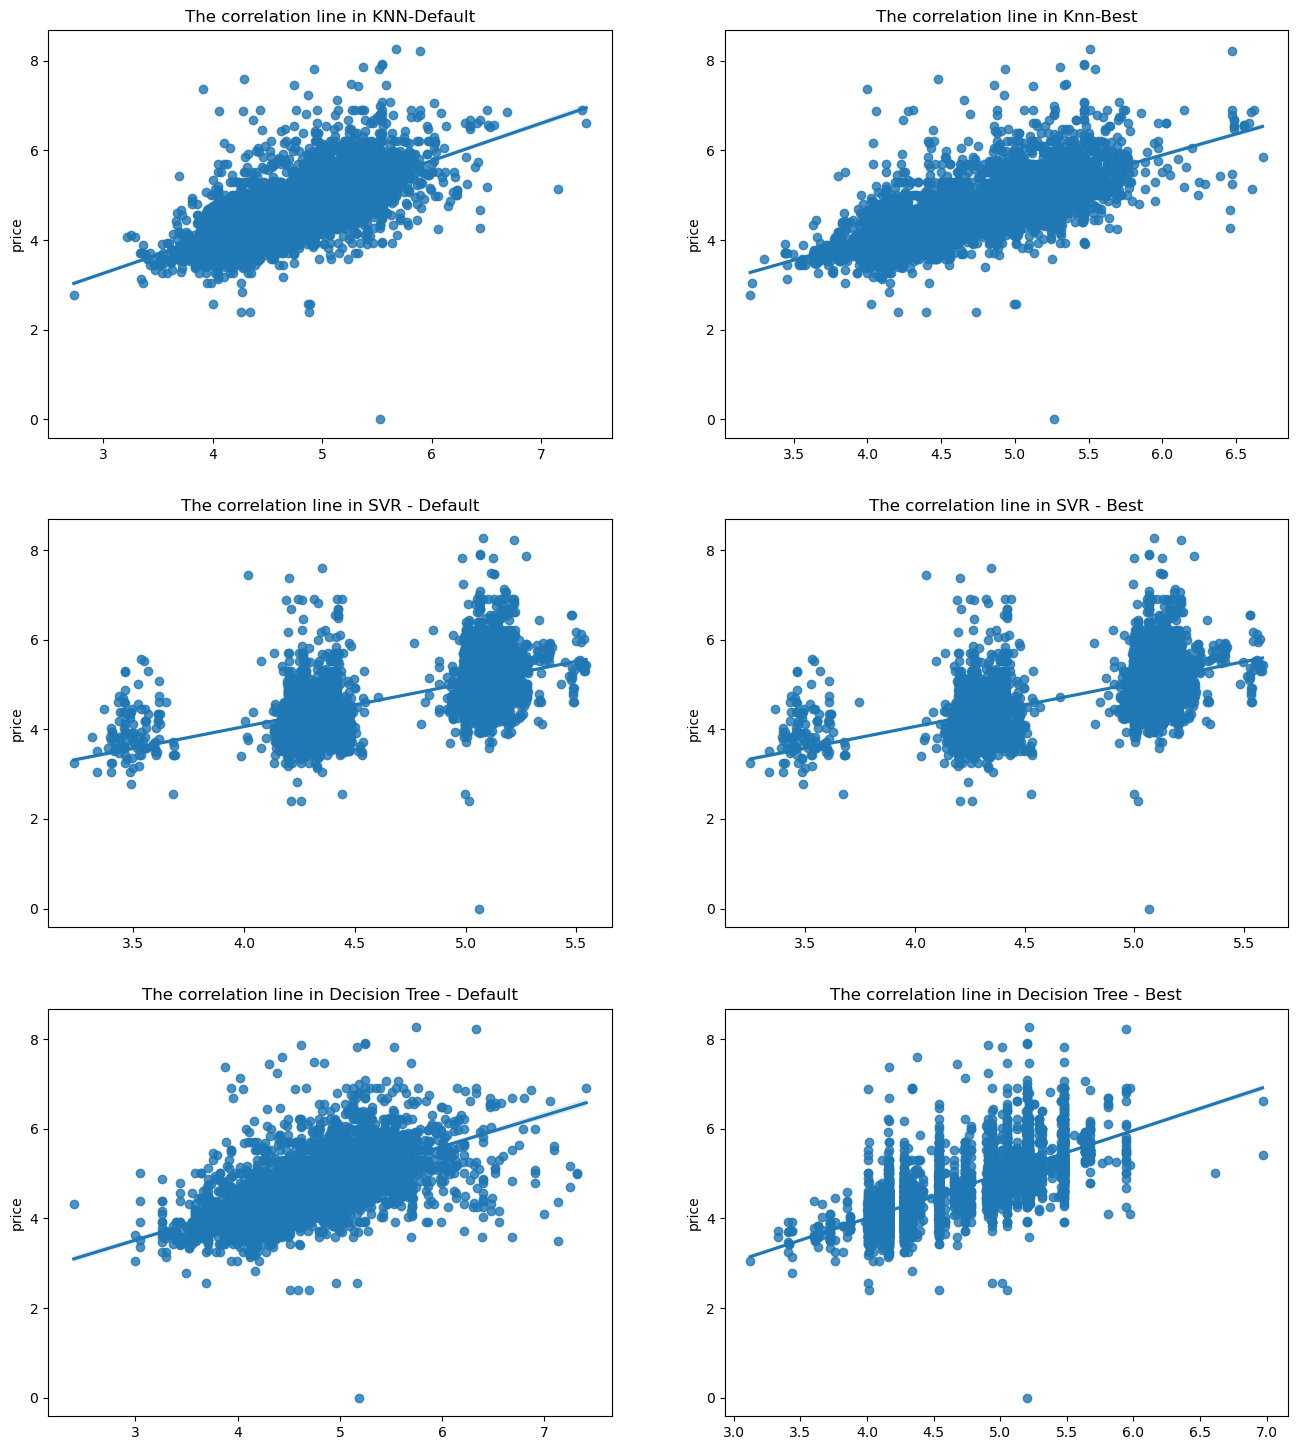

In [38]:
prediction_dictionaries['Decision Tree - Best'] = tree_model_prediction_best
plot_all_r2()

The group points became less in the best model of Decision Tree. And this is directly affected the performance as we can see correlation line from the graph. And the mean squared error is less in the best model because model performed better. More points collapse around 100-200 price scale. Since the data is mostly around 0-200, the performance is better than the default model of the Decision Tree.

In [39]:
prediction_list['Decision Tree - Best'] = np.array(preds_svr_best[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default,SVR-Best,Decision Tree - Default,Decision Tree - Best
Actual Values,,,,,,
5.583496,5.530561,5.265173,5.061016,5.066250,5.061016,5.066250
4.094345,4.173382,4.209026,4.335282,4.328617,4.335282,4.328617
3.931826,3.969236,4.089967,4.297170,4.300264,4.297170,4.300264
3.526361,3.613199,3.658071,4.317732,4.333715,4.317732,4.333715
3.526361,3.984643,3.809675,4.473532,4.477010,4.473532,4.477010
6.165418,6.032460,5.941771,5.500234,5.544217,5.500234,5.544217
3.761200,4.519436,4.528826,4.308242,4.308687,4.308242,4.308687
5.968708,6.039628,5.895784,5.496034,5.540218,5.496034,5.540218
6.552508,4.740353,4.856843,5.128876,5.125432,5.128876,5.125432


In [40]:
error_list['Decision Tree - Best'] = [tree_mse_best, tree_r2_best]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586
SVR Best,0.294826,0.383497
Decision Tree - Default,0.336144,0.297099
Decision Tree - Best,0.243923,0.489938


#### RANDOM FOREST
Random Forest is supervised machine learning algorithms which can be used for regression. 

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=42) #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mse = metrics.mean_squared_error(y_test, forest_model_prediction)
forest_mae = metrics.mean_absolute_error(y_test, forest_model_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = metrics.r2_score(y_test, forest_model_prediction)

print("Mean Squared Error: {}".format(forest_mse))
print("Mean Absolute Error: {}".format(forest_mae))
print("Root Mean Absolute Error: {}".format(forest_rmse))
print("R2 score: {}".format(forest_r2))

Mean Squared Error: 0.27321396332909226
Mean Absolute Error: 0.3725685709666235
Root Mean Absolute Error: 0.5226987309426839
R2 score: 0.4286892583835016


Hyperparameter tuning takes too much time, approximately at least 40 minutes, to finish for random forest model. Therefore, we didn't apply Hyperparameter tuning.

Actually, default random forest gives the best solution among the models that we tried so far. However, it has some performance issues compared to other models.


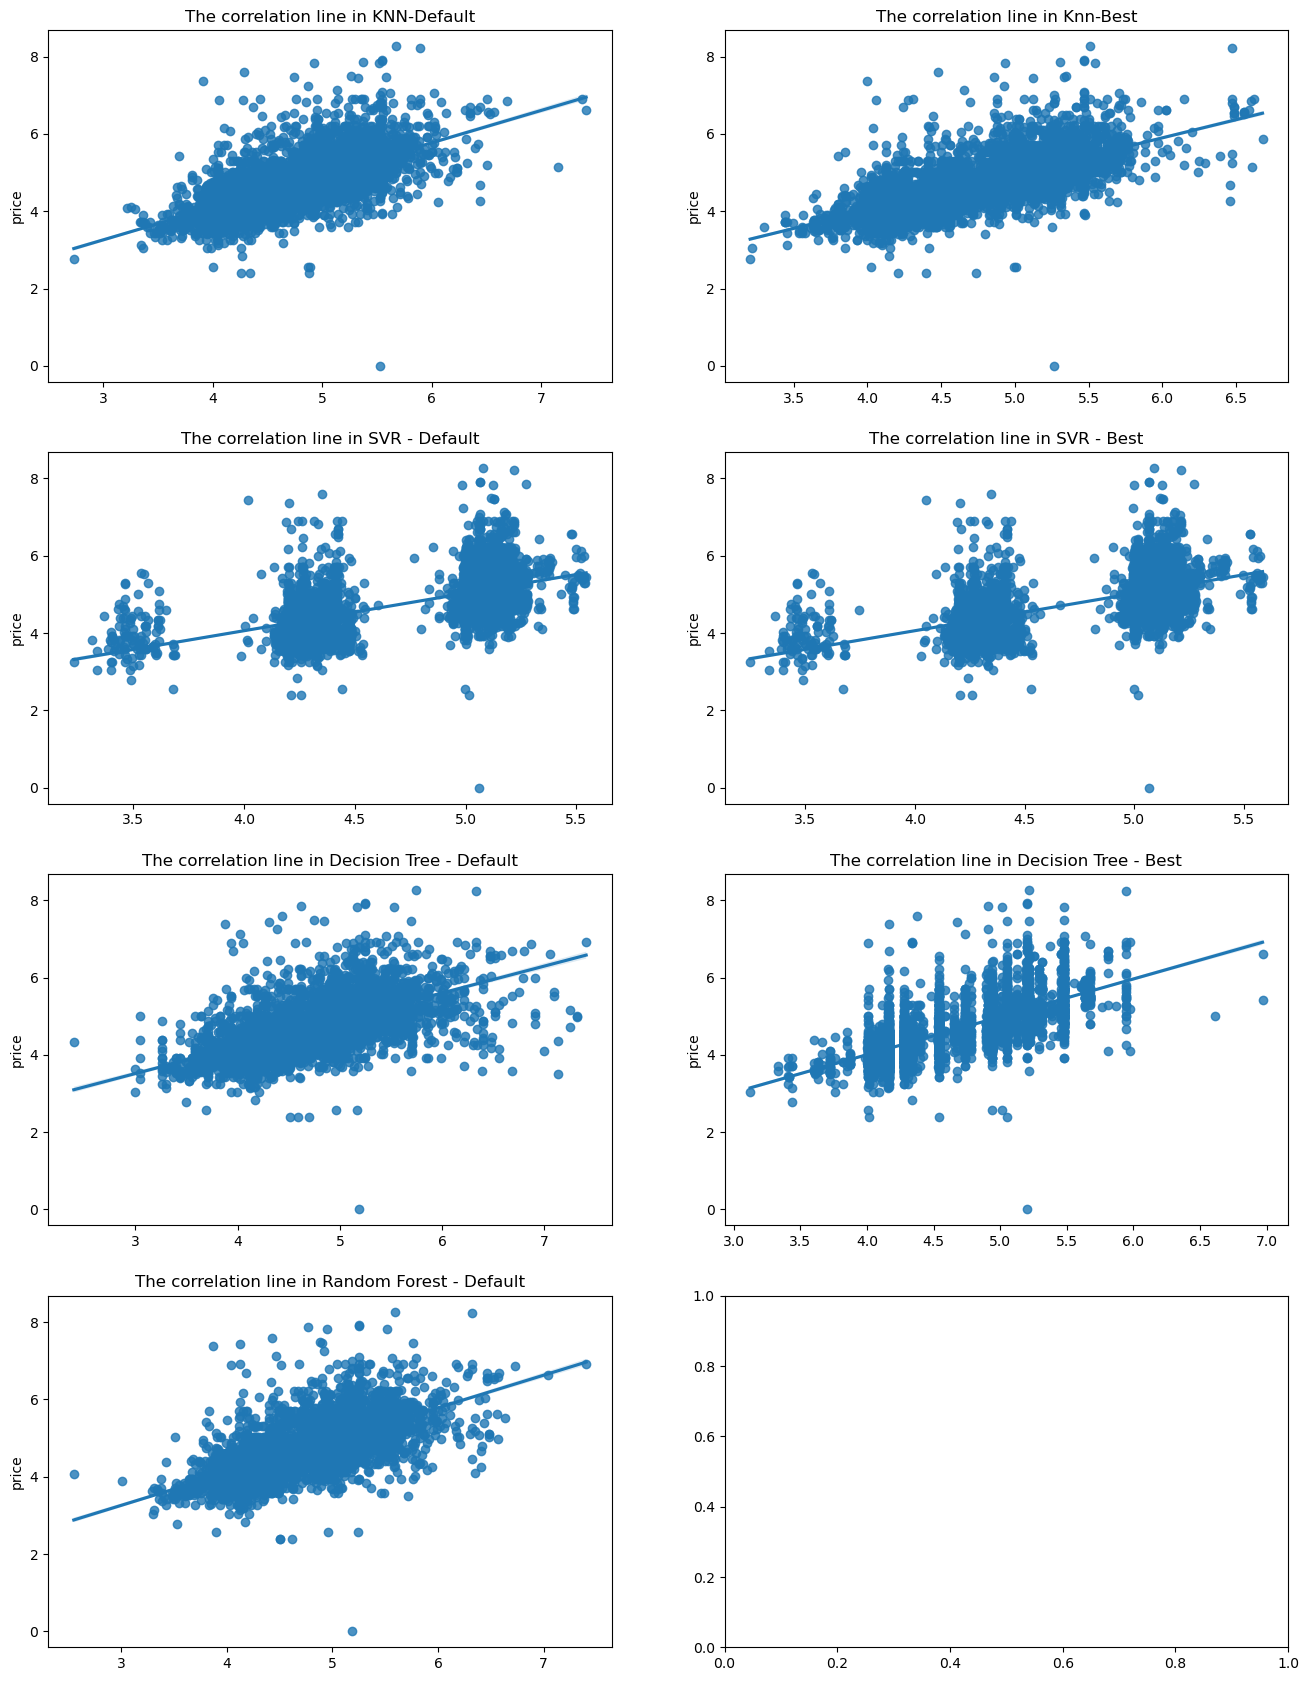

In [42]:
prediction_dictionaries['Random Forest - Default'] = forest_model_prediction
plot_all_r2()

The points are more spreaded in the Random Forest. Since the Random Forest runs lots of Decision Tree's and get the best tree as the classifier, it is very natural to have a better performance than the Decision Tree. The correlation line performed better than the rest. Since the points are more spreaded and in correct places the mean squared error is less than the rest. Random Forest performed best for now. But let's see other models if we can improve.

In [43]:
prediction_list['Random Forest - Default'] = np.array(preds_svr[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default,SVR-Best,Decision Tree - Default,Decision Tree - Best,Random Forest - Default
Actual Values,,,,,,,
5.583496,5.530561,5.265173,5.061016,5.066250,5.061016,5.066250,5.061016
4.094345,4.173382,4.209026,4.335282,4.328617,4.335282,4.328617,4.335282
3.931826,3.969236,4.089967,4.297170,4.300264,4.297170,4.300264,4.297170
3.526361,3.613199,3.658071,4.317732,4.333715,4.317732,4.333715,4.317732
3.526361,3.984643,3.809675,4.473532,4.477010,4.473532,4.477010,4.473532
6.165418,6.032460,5.941771,5.500234,5.544217,5.500234,5.544217,5.500234
3.761200,4.519436,4.528826,4.308242,4.308687,4.308242,4.308687,4.308242
5.968708,6.039628,5.895784,5.496034,5.540218,5.496034,5.540218,5.496034
6.552508,4.740353,4.856843,5.128876,5.125432,5.128876,5.125432,5.128876


In [44]:
error_list['Random Forest - Default'] = [forest_mse, forest_r2]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586
SVR Best,0.294826,0.383497
Decision Tree - Default,0.336144,0.297099
Decision Tree - Best,0.243923,0.489938
Random Forest - Default,0.273214,0.428689


#### LINEAR REGRESSION

###### BEFORE HYPERPARAMETER TUNING

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


linear_model = LinearRegression().fit(X_train, y_train)
linear_model_prediction = linear_model.predict(X_test)

linear_mse = metrics.mean_squared_error(y_test, linear_model_prediction)
linear_mae = metrics.mean_absolute_error(y_test, linear_model_prediction)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = metrics.r2_score(y_test, linear_model_prediction)

print("Mean Squared Error: {}".format(linear_mse))
print("Mean Absolute Error: {}".format(linear_mae))
print("Root Mean Absolute Error: {}".format(linear_rmse))
print("R2 score: {}".format(linear_r2))

Mean Squared Error: 0.2936064460143752
Mean Absolute Error: 0.3990002881325295
Root Mean Absolute Error: 0.5418546355014185
R2 score: 0.38604705860582256


The error found in linear regression is 6704. Let's see that does it possible to decrease error by hyperparameter tuning for linear regression.

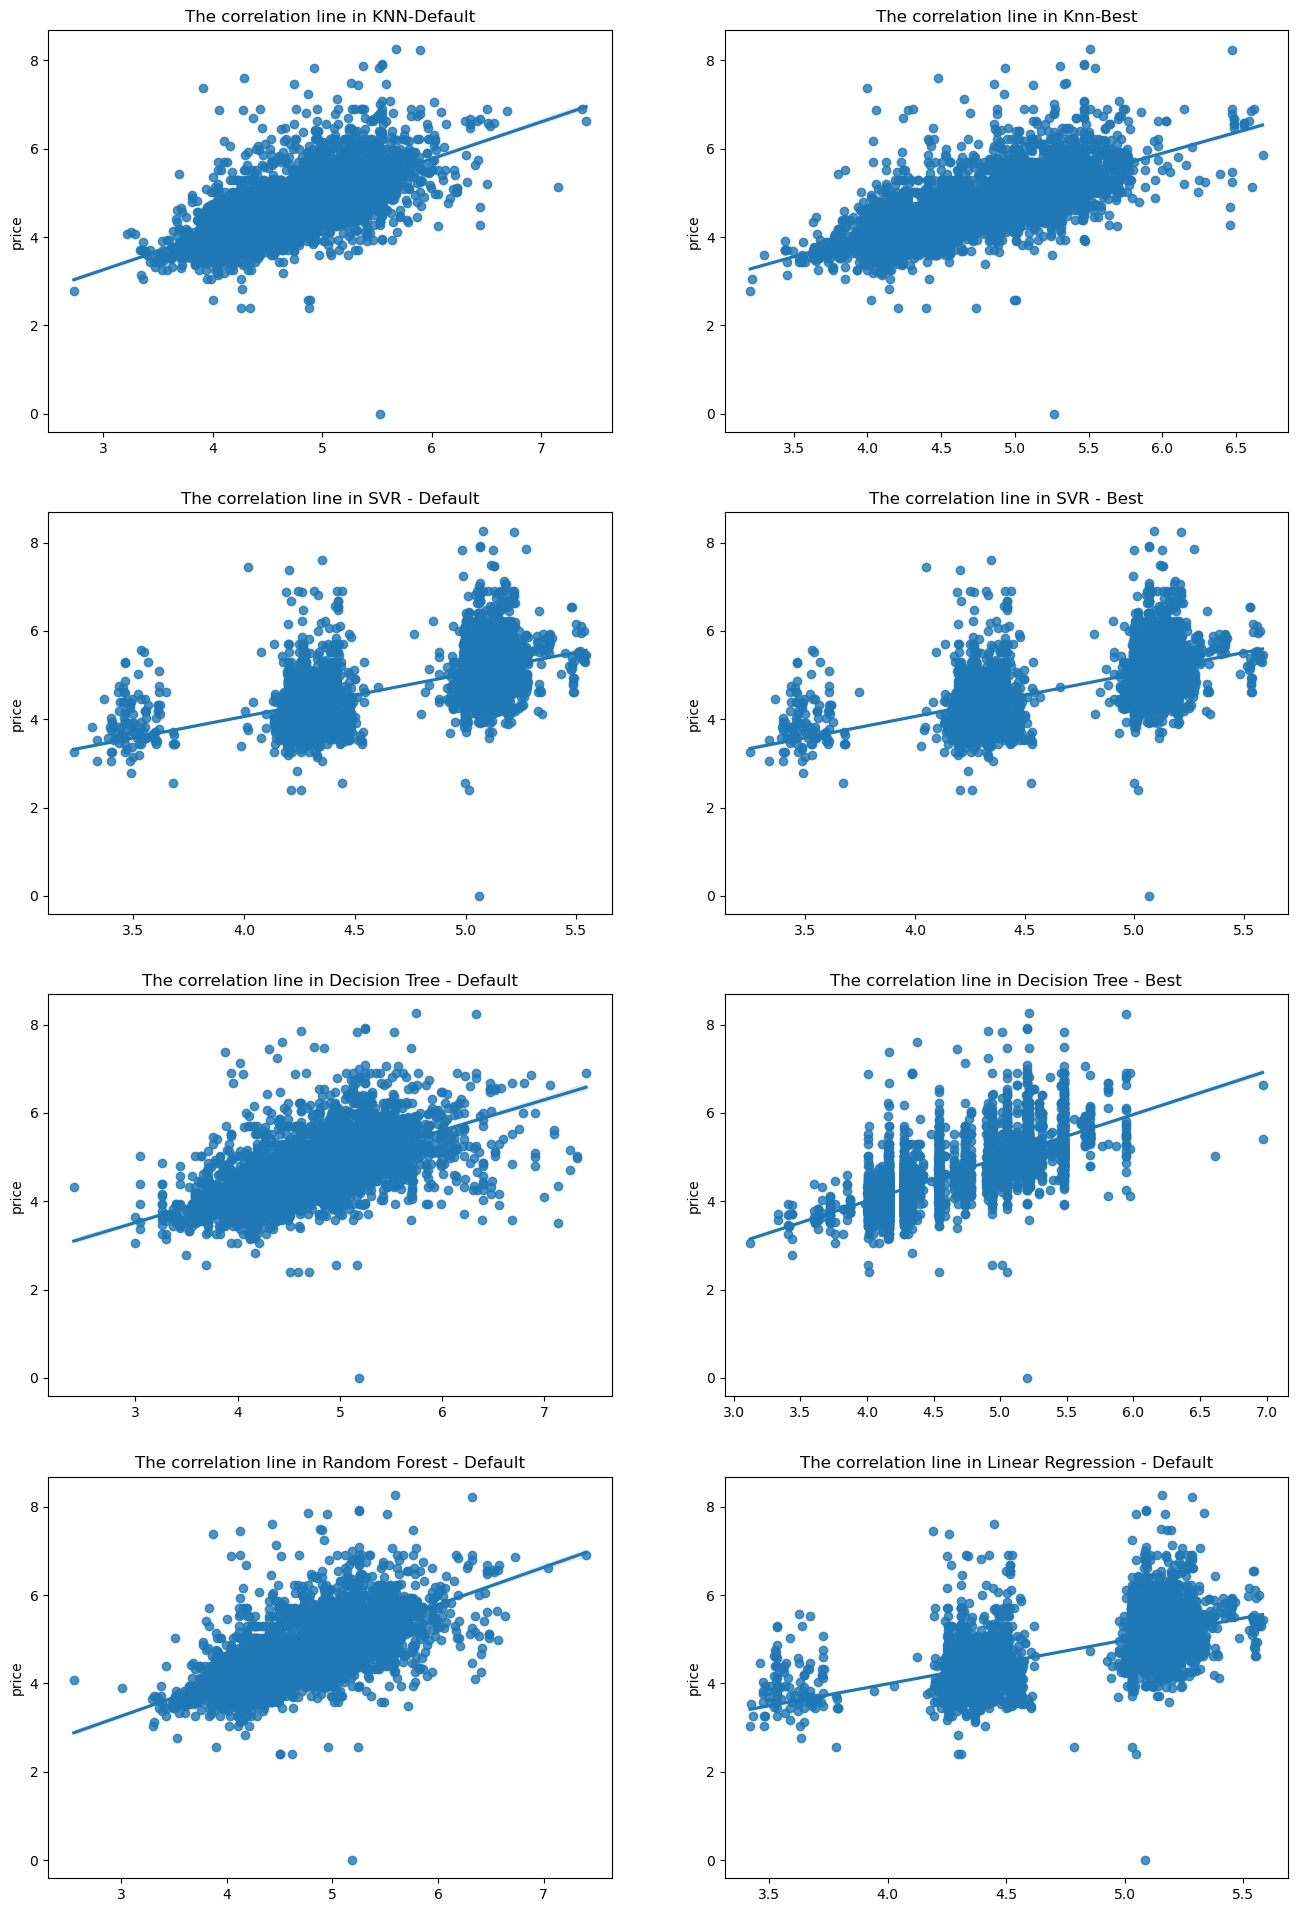

In [46]:
prediction_dictionaries['Linear Regression - Default'] = linear_model_prediction
plot_all_r2()

In [47]:
prediction_list['Linear Regression - Default'] = np.array(preds_svr[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default,SVR-Best,Decision Tree - Default,Decision Tree - Best,Random Forest - Default,Linear Regression - Default
Actual Values,,,,,,,,
5.583496,5.530561,5.265173,5.061016,5.066250,5.061016,5.066250,5.061016,5.061016
4.094345,4.173382,4.209026,4.335282,4.328617,4.335282,4.328617,4.335282,4.335282
3.931826,3.969236,4.089967,4.297170,4.300264,4.297170,4.300264,4.297170,4.297170
3.526361,3.613199,3.658071,4.317732,4.333715,4.317732,4.333715,4.317732,4.317732
3.526361,3.984643,3.809675,4.473532,4.477010,4.473532,4.477010,4.473532,4.473532
6.165418,6.032460,5.941771,5.500234,5.544217,5.500234,5.544217,5.500234,5.500234
3.761200,4.519436,4.528826,4.308242,4.308687,4.308242,4.308687,4.308242,4.308242
5.968708,6.039628,5.895784,5.496034,5.540218,5.496034,5.540218,5.496034,5.496034
6.552508,4.740353,4.856843,5.128876,5.125432,5.128876,5.125432,5.128876,5.128876


In [48]:
error_list['Linear Regression - Default'] = [linear_mse, linear_r2]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586
SVR Best,0.294826,0.383497
Decision Tree - Default,0.336144,0.297099
Decision Tree - Best,0.243923,0.489938
Random Forest - Default,0.273214,0.428689
Linear Regression - Default,0.293606,0.386047


##### APPLY HYPERPARAMETER TUNING AND CROSS VALIDATION

We use different techniques for validation our linear regression model called *Ridge*.
   
Since we cannot apply hyperparameter tuning into Linear Regression directly, we will use Ridge in order to apply Hyperparameter tuning.

In [49]:
from sklearn.linear_model import Ridge

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750, 1000, 1500, 2500, 5000, 10000, 100000, 1000000]
param_grid = {
    'alpha': alpha
}

ridge = Ridge(alpha=1).fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("CV Mean for Ridge (r2): ", np.mean(scores))
print("CV Mean for Ridge (mse): ", np.mean(scores_mse) * -1)

CV Mean for Ridge (r2):  0.3917235852693091
CV Mean for Ridge (mse):  0.294405443067942


In [50]:
grid_mse = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result_mse = grid_mse.fit(X_train, y_train)

grid_r2 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_r2 = grid_r2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [51]:
print('Best Score for mse: ', grid_mse.best_score_ * -1)
print('Best Params for mse: ', grid_mse.best_params_)
print()
print('Best Score for r2: ', grid_r2.best_score_)
print('Best Params for r2: ', grid_r2.best_params_)

Best Score for mse:  0.294405400100894
Best Params for mse:  {'alpha': 10}

Best Score for r2:  0.391723682628605
Best Params for r2:  {'alpha': 10}


In [52]:
ridge_best = Ridge(alpha=500).fit(X_train, y_train)
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

ridge_mse_best = metrics.mean_squared_error(y_test, ridge_pred)
ridge_mae_best = metrics.mean_absolute_error(y_test, ridge_pred)
ridge_rmse_best = np.sqrt(ridge_mse_best)
ridge_r2_best = metrics.r2_score(y_test, ridge_pred)

print("Mean Squared Error: {}".format(ridge_mse_best))
print("Mean Absolute Error: {}".format(ridge_mae_best))
print("Root Mean Absolute Error: {}".format(ridge_rmse_best))
print("R2 score: {}".format(ridge_r2_best))

Mean Squared Error: 0.2936202705190274
Mean Absolute Error: 0.3989487331055269
Root Mean Absolute Error: 0.5418673920056709
R2 score: 0.3860181505371826


After using Grid Search CV, we found that alpha=500 is the best parameter for Ridge. We can see the effect of Hyperparameter Tuning compared to default Ridge. However, we do not have significant between Ridge and Linear Regression model.

In [53]:
dict_val = {
    'Linear Model': [linear_r2, linear_mse],
    'Ridge': [ridge_r2_best, ridge_mse_best]
}
res_df_linear_ridge = pd.DataFrame(dict_val, index=['R2', 'MSE'])
res_df_linear_ridge

,Linear Model,Ridge
R2,0.386047,0.386018
MSE,0.293606,0.293620


In [54]:
prediction_dictionaries['Ridge'] = ridge_pred

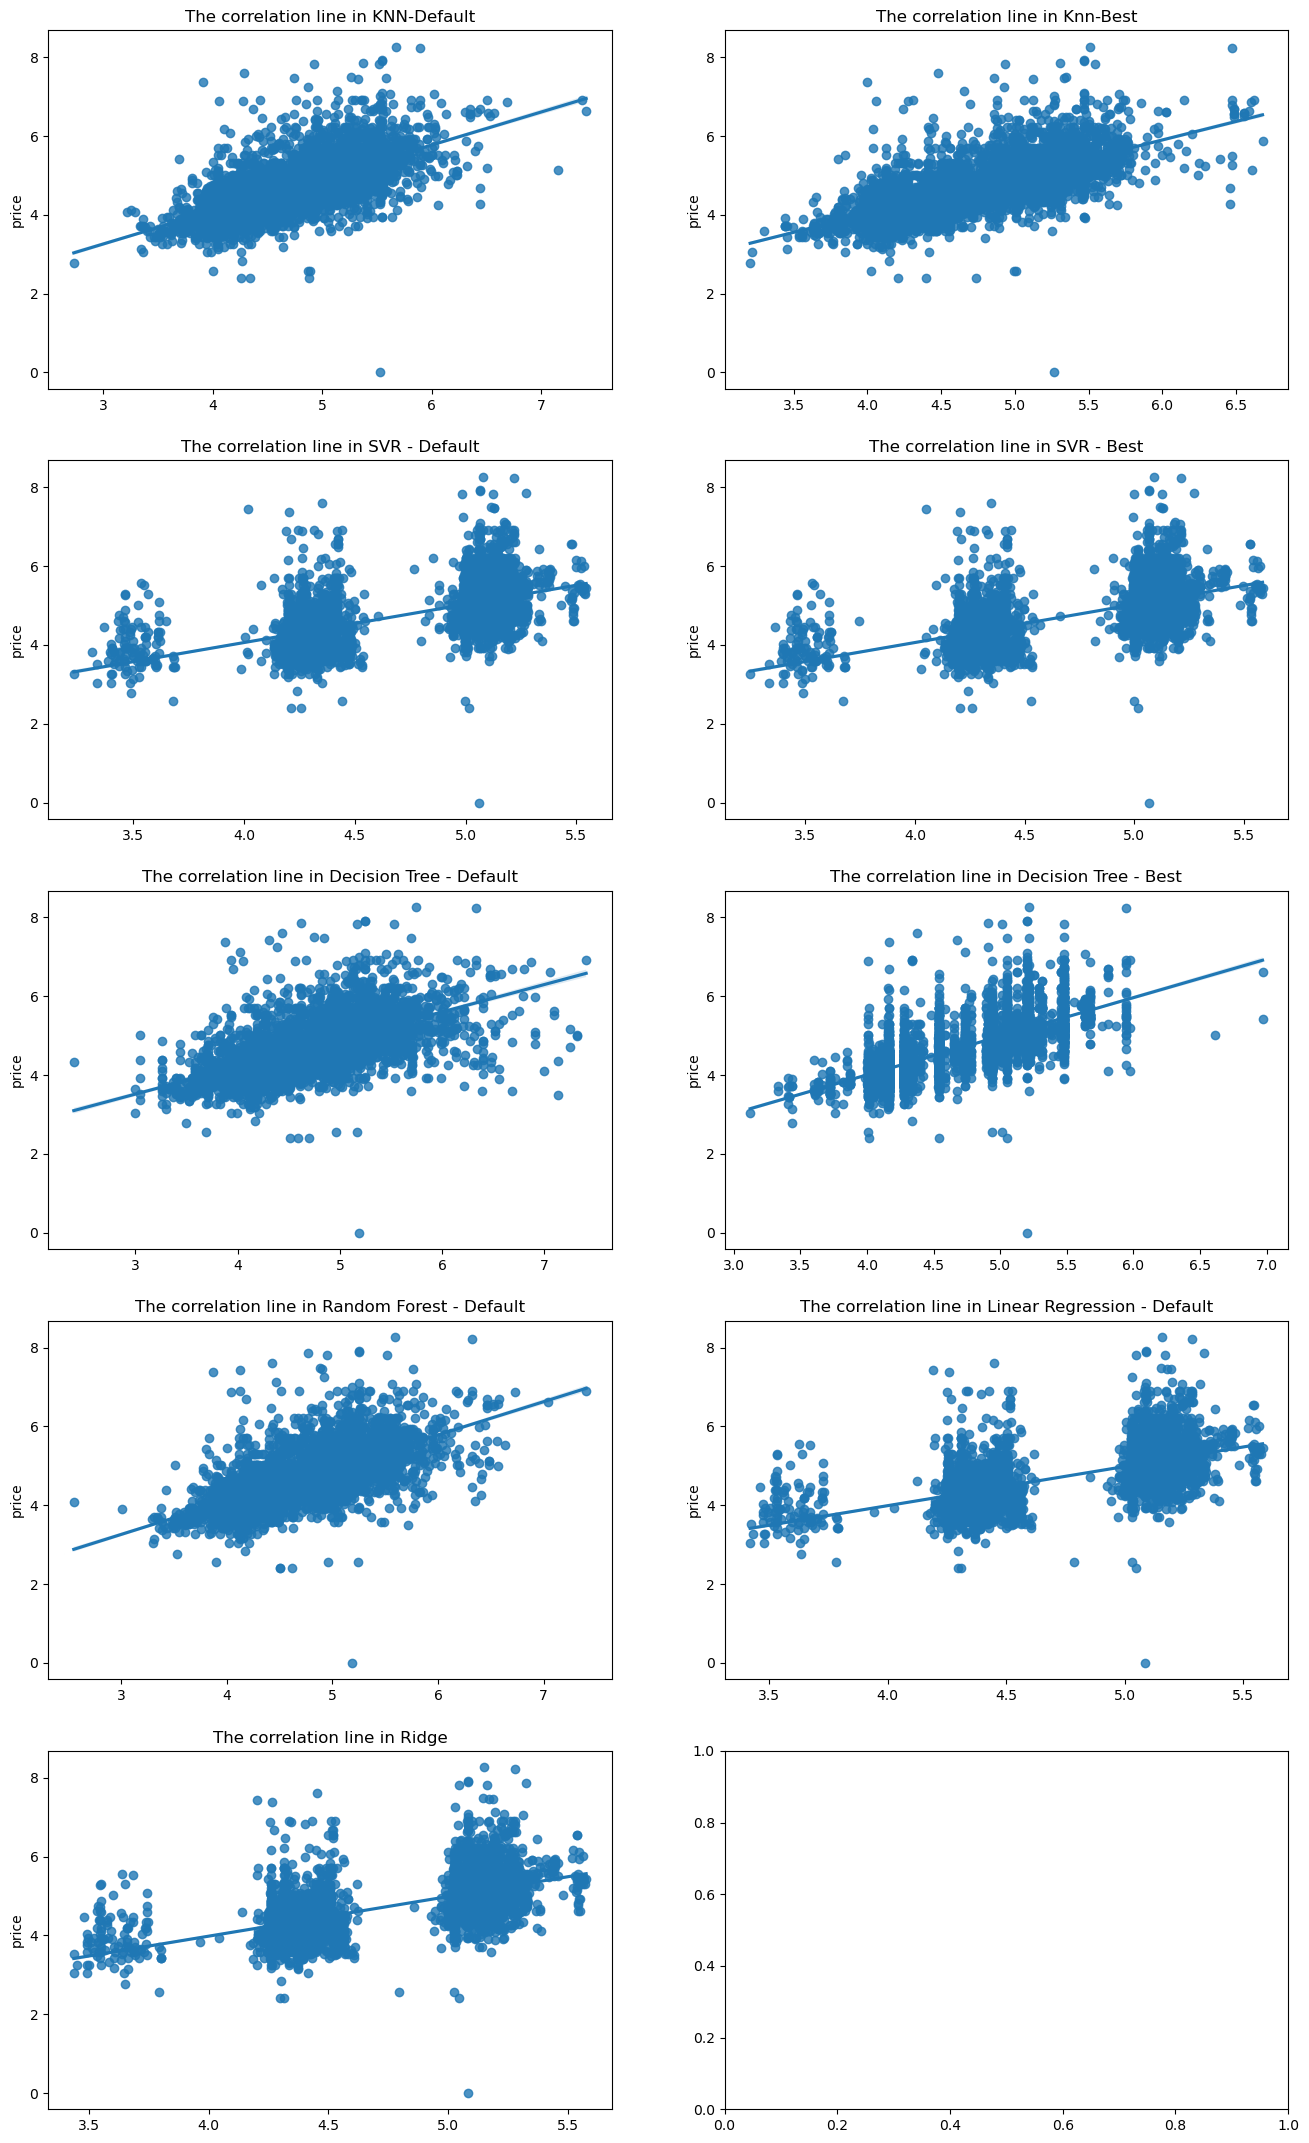

In [55]:
plot_all_r2()

In [56]:
prediction_list['Ridge'] = np.array(preds_svr[:20])
prediction_list

,KNN-Default,KNN-Best,SVR-Default,SVR-Best,Decision Tree - Default,Decision Tree - Best,Random Forest - Default,Linear Regression - Default,Ridge
Actual Values,,,,,,,,,
5.583496,5.530561,5.265173,5.061016,5.066250,5.061016,5.066250,5.061016,5.061016,5.061016
4.094345,4.173382,4.209026,4.335282,4.328617,4.335282,4.328617,4.335282,4.335282,4.335282
3.931826,3.969236,4.089967,4.297170,4.300264,4.297170,4.300264,4.297170,4.297170,4.297170
3.526361,3.613199,3.658071,4.317732,4.333715,4.317732,4.333715,4.317732,4.317732,4.317732
3.526361,3.984643,3.809675,4.473532,4.477010,4.473532,4.477010,4.473532,4.473532,4.473532
6.165418,6.032460,5.941771,5.500234,5.544217,5.500234,5.544217,5.500234,5.500234,5.500234
3.761200,4.519436,4.528826,4.308242,4.308687,4.308242,4.308687,4.308242,4.308242,4.308242
5.968708,6.039628,5.895784,5.496034,5.540218,5.496034,5.540218,5.496034,5.496034,5.496034
6.552508,4.740353,4.856843,5.128876,5.125432,5.128876,5.125432,5.128876,5.128876,5.128876


In [57]:
error_list['Ridge'] = [ridge_mse_best, ridge_r2_best]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,0.267305,0.441046
MSE KNN-Best,0.241622,0.494750
SVR Default,0.294783,0.383586
SVR Best,0.294826,0.383497
Decision Tree - Default,0.336144,0.297099
Decision Tree - Best,0.243923,0.489938
Random Forest - Default,0.273214,0.428689
Linear Regression - Default,0.293606,0.386047
Ridge,0.293620,0.386018


[CV 1/5; 2/6] START n_neighbors=5, p=2..........................................
[CV 1/5; 2/6] END ..........n_neighbors=5, p=2;, score=-0.289 total time=   0.2s
[CV 1/5; 4/6] START n_neighbors=10, p=2.........................................
[CV 1/5; 4/6] END .........n_neighbors=10, p=2;, score=-0.261 total time=   0.6s
[CV 2/5; 6/6] START n_neighbors=15, p=2.........................................
[CV 2/5; 6/6] END .........n_neighbors=15, p=2;, score=-0.240 total time=   0.3s
[CV 3/5; 1/40] START C=0.1, dual=True, loss=epsilon_insensitive, tol=0.0001.....
[CV 3/5; 1/40] END C=0.1, dual=True, loss=epsilon_insensitive, tol=0.0001;, score=-0.309 total time=   0.6s
[CV 3/5; 3/40] START C=0.1, dual=True, loss=squared_epsilon_insensitive, tol=0.0001
[CV 3/5; 3/40] END C=0.1, dual=True, loss=squared_epsilon_insensitive, tol=0.0001;, score=-0.311 total time=   3.9s
[CV 1/5; 5/40] START C=0.1, dual=False, loss=epsilon_insensitive, tol=0.0001....
[CV 1/5; 5/40] END C=0.1, dual=False, loss=e

[CV 2/5; 2/6] START n_neighbors=5, p=2..........................................
[CV 2/5; 2/6] END ..........n_neighbors=5, p=2;, score=-0.262 total time=   0.2s
[CV 4/5; 3/6] START n_neighbors=10, p=1.........................................
[CV 4/5; 3/6] END .........n_neighbors=10, p=1;, score=-0.264 total time=   0.6s
[CV 3/5; 6/6] START n_neighbors=15, p=2.........................................
[CV 3/5; 6/6] END .........n_neighbors=15, p=2;, score=-0.280 total time=   0.3s
[CV 1/5; 2/40] START C=0.1, dual=True, loss=epsilon_insensitive, tol=1e-05......
[CV 1/5; 2/40] END C=0.1, dual=True, loss=epsilon_insensitive, tol=1e-05;, score=-0.286 total time=   0.6s
[CV 5/5; 3/40] START C=0.1, dual=True, loss=squared_epsilon_insensitive, tol=0.0001
[CV 5/5; 3/40] END C=0.1, dual=True, loss=squared_epsilon_insensitive, tol=0.0001;, score=-0.337 total time=   4.1s
[CV 2/5; 8/40] START C=0.1, dual=False, loss=squared_epsilon_insensitive, tol=1e-05
[CV 2/5; 8/40] END C=0.1, dual=False, loss

[CV 2/5; 1/6] START n_neighbors=5, p=1..........................................
[CV 2/5; 1/6] END ..........n_neighbors=5, p=1;, score=-0.262 total time=   0.3s
[CV 2/5; 3/6] START n_neighbors=10, p=1.........................................
[CV 2/5; 3/6] END .........n_neighbors=10, p=1;, score=-0.252 total time=   0.7s
[CV 3/5; 5/6] START n_neighbors=15, p=1.........................................
[CV 3/5; 5/6] END .........n_neighbors=15, p=1;, score=-0.280 total time=   0.4s
[CV 4/5; 6/6] START n_neighbors=15, p=2.........................................
[CV 4/5; 6/6] END .........n_neighbors=15, p=2;, score=-0.262 total time=   0.2s
[CV 5/5; 1/40] START C=0.1, dual=True, loss=epsilon_insensitive, tol=0.0001.....
[CV 5/5; 1/40] END C=0.1, dual=True, loss=epsilon_insensitive, tol=0.0001;, score=-0.353 total time=   0.5s
[CV 1/5; 3/40] START C=0.1, dual=True, loss=squared_epsilon_insensitive, tol=0.0001
[CV 1/5; 3/40] END C=0.1, dual=True, loss=squared_epsilon_insensitive, tol=0.00

[CV 1/5; 1/6] START n_neighbors=5, p=1..........................................
[CV 1/5; 1/6] END ..........n_neighbors=5, p=1;, score=-0.290 total time=   0.3s
[CV 4/5; 2/6] START n_neighbors=5, p=2..........................................
[CV 4/5; 2/6] END ..........n_neighbors=5, p=2;, score=-0.285 total time=   0.4s
[CV 5/5; 3/6] START n_neighbors=10, p=1.........................................
[CV 5/5; 3/6] END .........n_neighbors=10, p=1;, score=-0.288 total time=   0.3s
[CV 1/5; 5/6] START n_neighbors=15, p=1.........................................
[CV 1/5; 5/6] END .........n_neighbors=15, p=1;, score=-0.257 total time=   0.6s
[CV 5/5; 6/6] START n_neighbors=15, p=2.........................................
[CV 5/5; 6/6] END .........n_neighbors=15, p=2;, score=-0.280 total time=   0.2s
[CV 2/5; 2/40] START C=0.1, dual=True, loss=epsilon_insensitive, tol=1e-05......
[CV 2/5; 2/40] END C=0.1, dual=True, loss=epsilon_insensitive, tol=1e-05;, score=-0.260 total time=   0.5s
[C

#### RESULTS & DISCUSSION

Random Forest model gives us the best score in R2 as well as MSE. However, as we described in Random Forest section, running time of the Random Forest model is slightly more than other models. Neural Network performed similar to Random Forest and two of them performed best among the other models. 

If we do not have time restriction, KNN or Neural Network can be used. Both give us noticeable performance and accuracy. If we had more data, neural network would perform better than the current performance

## CONCLUSION




1.   We trained the data in several models with hyperparameter tuning to see best parameters for each model.
2.  In most of the models, they performed similar but neural network performed best.

3. The errors is slightly better than the Kaggle Results. 

## WHAT CAN BE DONE TO INCREASE ACCURACY



*   There could be more data.
*   Models can be trained in lots of parameters to see which one is best. Since it took so much time, we did not train in every possible of combination.

## REFERENCES



1.   https://www.airbnb.com/help/article/2503/what-is-airbnb-and-how-does-it-work

2. https://automating-gis-processes.github.io/site/notebooks/L3/nearest-neighbor-faster.html

3. https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja/data

4.   http://go.euromonitor.com/rs/805-KOK-719/images/wpTop100Cities19.pdf?mkt_tok=eyJpIjoiTVRsaU5Ua3lObVUwT1RVdyIsInQiOiJ2RWRQREV6S1wvN0U5N0R3aXI2MjZrRmhsRFpRc1RSNFZBUDljXC9wcFBVWmZcL2thaVRSYm5pOHJERVVxcXpTWVNHbUd1SjhHa0NqQ0g4bGk1a2JreDIzME5UbFFrSFpTblhoczVDcm91OXRSZmh4ZVUyc1dyaVlUeFppWHZNT1U5SiJ9

5. https://www.kaggle.com/erikbruin/airbnb-the-amsterdam-story-with-interactive-maps

6. https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.city=New+York

7. https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

8. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html